In [7]:
import glob
import yaml
import pandas as pd
import os
import matplotlib.pyplot as plt

In [8]:
files = [f for f in glob.glob("outputs/adamw_38/downstream/**/metrics_adamw_38.yaml", recursive=True)
         if "adamw+_incomplete" not in f]

In [9]:
records = []
for f in files:
    with open(f, "r") as fh:
        data = yaml.safe_load(fh)
    # variant is the immediate parent folder (adamw or adamw+)
    variant = os.path.basename(os.path.dirname(f))
    data["variant"] = variant
    if '2025-09-03' in f or '2025-09-01' in f:
        continue
    # data["source_file"] = f
    print(f)
    records.append(data)
df = pd.DataFrame(records)

outputs/adamw_38/downstream/extra_day2/adamw/metrics_adamw_38.yaml
outputs/adamw_38/downstream/extra_day2/adamw+/metrics_adamw_38.yaml
outputs/adamw_38/downstream/2025-09-08/adamw/metrics_adamw_38.yaml
outputs/adamw_38/downstream/2025-09-08/adamw+/metrics_adamw_38.yaml
outputs/adamw_38/downstream/2025-09-06/adamw/metrics_adamw_38.yaml
outputs/adamw_38/downstream/2025-09-06/adamw+/metrics_adamw_38.yaml
outputs/adamw_38/downstream/2025-09-10/adamw/metrics_adamw_38.yaml
outputs/adamw_38/downstream/2025-09-10/adamw+/metrics_adamw_38.yaml
outputs/adamw_38/downstream/2025-09-02/adamw/metrics_adamw_38.yaml
outputs/adamw_38/downstream/2025-09-02/adamw+/metrics_adamw_38.yaml
outputs/adamw_38/downstream/extra_day/adamw/metrics_adamw_38.yaml
outputs/adamw_38/downstream/extra_day/adamw+/metrics_adamw_38.yaml


In [4]:
df.columns

Index(['GLUE_amean', 'GLUE_hmean', 'GPU', 'RAM', 'VRAM',
       'cola_matthews_correlation', 'kWh', 'mnli_accuracy',
       'mnli_accuracy_extra', 'mrpc_accuracy', 'mrpc_f1', 'numGPUs',
       'qnli_accuracy', 'qqp_accuracy', 'qqp_f1', 'rte_accuracy',
       'sst2_accuracy', 'stsb_pearson', 'stsb_spearmanr', 'variant'],
      dtype='object')

In [5]:
df = df.drop(['GPU', 'RAM', 'VRAM', 'kWh', 'numGPUs'], axis=1)

In [6]:
df

,GLUE_amean,GLUE_hmean,cola_matthews_correlation,mnli_accuracy,mnli_accuracy_extra,mrpc_accuracy,mrpc_f1,qnli_accuracy,qqp_accuracy,qqp_f1,rte_accuracy,sst2_accuracy,stsb_pearson,stsb_spearmanr,variant
0,0.804359,0.767669,0.511154,0.849210,0.853743,0.823529,0.882353,0.913234,0.909028,0.878558,0.545126,0.933486,0.872362,0.867807,adamw
1,0.800522,0.757981,0.490048,0.848497,0.851200,0.855392,0.901830,0.909207,0.908286,0.877688,0.523466,0.931193,0.871569,0.867070,adamw+
2,0.798198,0.757969,0.469087,0.849822,0.850793,0.786765,0.860353,0.907377,0.908187,0.877054,0.566787,0.927752,0.874762,0.870943,adamw
3,0.802930,0.765086,0.507993,0.850433,0.848454,0.840686,0.891486,0.907926,0.909795,0.878817,0.537906,0.930046,0.873310,0.867963,adamw+
4,0.804352,0.767000,0.498739,0.851044,0.854760,0.845588,0.895175,0.907560,0.908459,0.877341,0.555957,0.930046,0.868545,0.865458,adamw
5,0.810872,0.782690,0.541666,0.845339,0.851505,0.838235,0.890365,0.902068,0.907049,0.875571,0.588448,0.936927,0.865958,0.862864,adamw+
6,0.803922,0.769705,0.519551,0.848599,0.851505,0.813725,0.876623,0.907743,0.908286,0.877349,0.552347,0.930046,0.871536,0.867003,adamw
7,0.809225,0.775002,0.499515,0.846663,0.857404,0.850490,0.898164,0.908292,0.907297,0.875820,0.592058,0.932339,0.872769,0.868188,adamw+
8,0.807000,0.772159,0.504703,0.850331,0.853234,0.835784,0.887015,0.910855,0.908039,0.877358,0.574007,0.939220,0.866279,0.863858,adamw
9,0.806736,0.773149,0.524433,0.851146,0.852319,0.843137,0.893333,0.909573,0.908138,0.876857,0.555957,0.924312,0.872692,0.869439,adamw+


In [32]:
print(df[["variant", "GLUE_amean", "GLUE_hmean"]].head(20))

   variant  GLUE_amean  GLUE_hmean
0    adamw    0.804359    0.767669
1   adamw+    0.800522    0.757981
2    adamw    0.798198    0.757969
3   adamw+    0.802930    0.765086
4    adamw    0.804352    0.767000
5   adamw+    0.810872    0.782690
6    adamw    0.803922    0.769705
7   adamw+    0.809225    0.775002
8    adamw    0.807000    0.772159
9   adamw+    0.806736    0.773149
10   adamw    0.807670    0.773418
11  adamw+    0.806502    0.773036


In [33]:
grouped = df.groupby("variant").median(numeric_only=True)

In [34]:
grouped.reset_index()

,variant,GLUE_amean,GLUE_hmean,cola_matthews_correlation,mnli_accuracy,mnli_accuracy_extra,mrpc_accuracy,mrpc_f1,qnli_accuracy,qqp_accuracy,qqp_f1,rte_accuracy,sst2_accuracy,stsb_pearson,stsb_spearmanr
0,adamw,0.804355,0.768687,0.507928,0.849924,0.852370,0.829657,0.884684,0.908109,0.908236,0.877345,0.561372,0.931766,0.871949,0.867405
1,adamw+,0.806619,0.773093,0.513810,0.848293,0.851861,0.841912,0.892410,0.908475,0.907915,0.876828,0.559567,0.931766,0.872731,0.868075


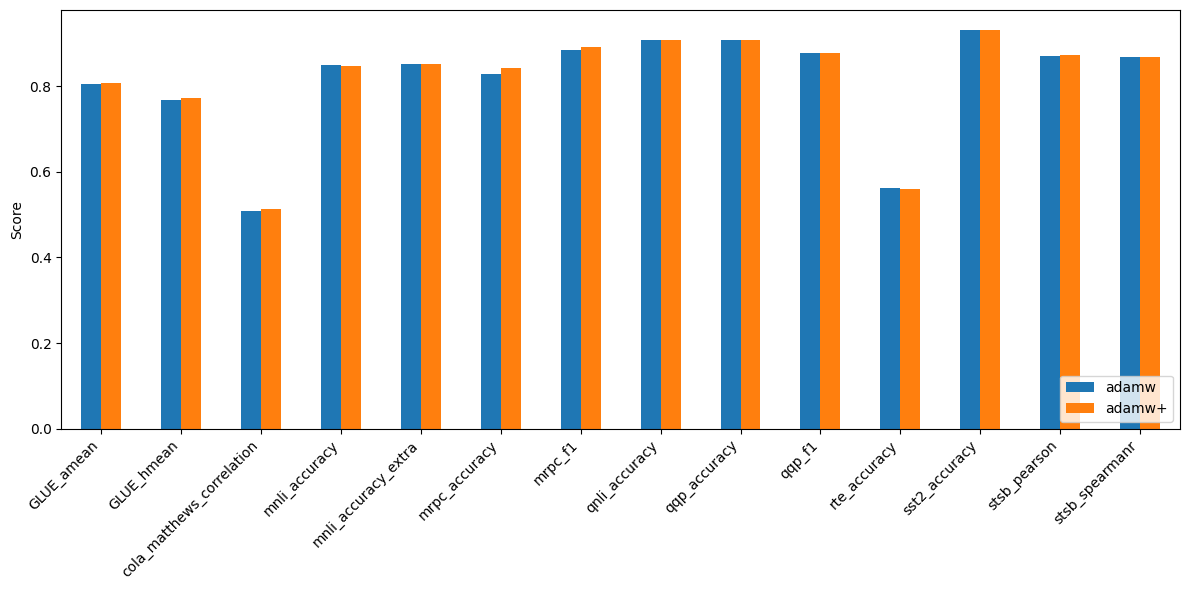

In [35]:
grouped = df.groupby("variant").median(numeric_only=True).T

# make bar plot
ax = grouped.plot(kind="bar", figsize=(12,6))

plt.ylabel("Score")
# plt.title("adamw vs adamw+ (median across runs)")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.legend(loc='lower right')
plt.show()

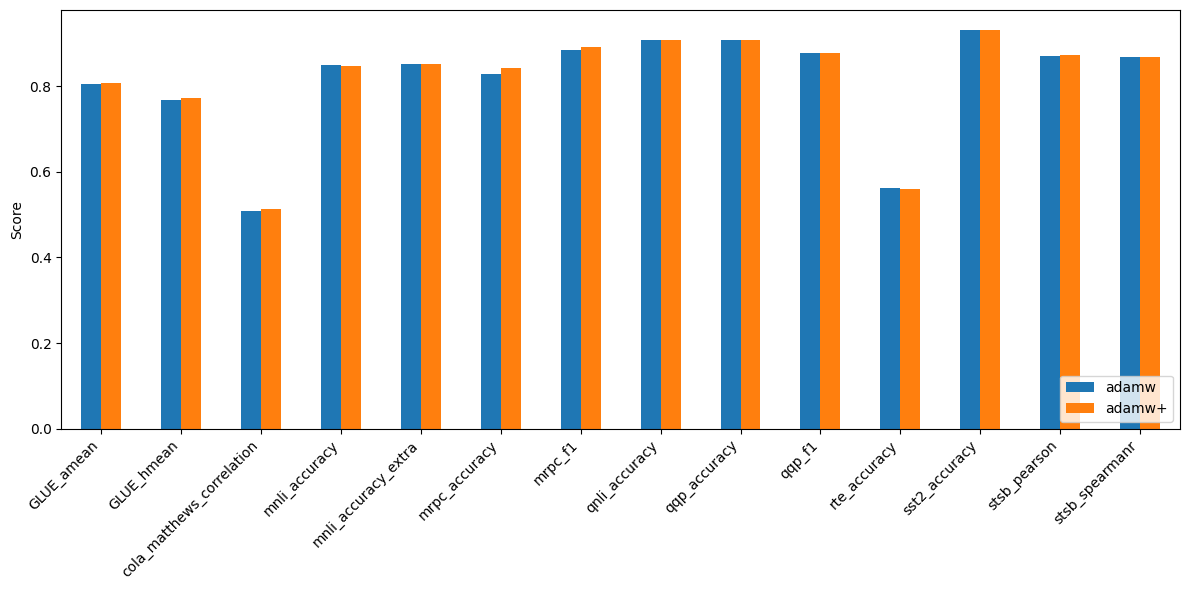

In [ ]:
grouped = df.groupby("variant").median(numeric_only=True).T

# make bar plot
ax = grouped.plot(kind="bar", figsize=(12,6))

plt.ylabel("Score")
# plt.title("adamw vs adamw+ (median across runs)")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.legend(loc='lower right')
plt.show()

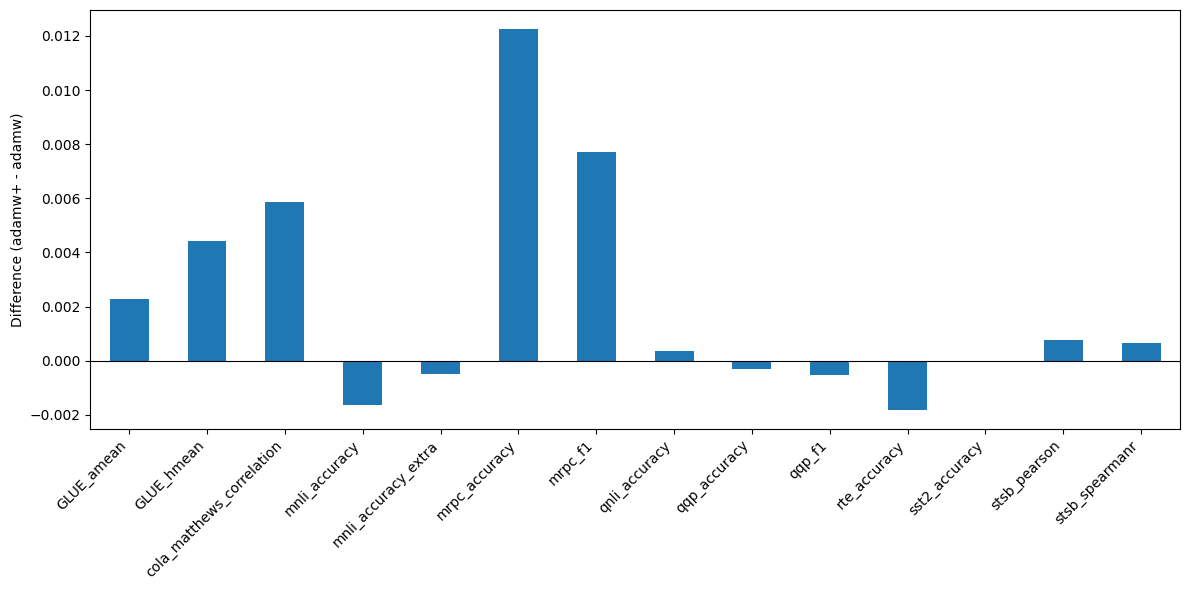

In [39]:
grouped = df.groupby("variant").median(numeric_only=True).T

# difference (adamw+ - adamw)
diff = grouped["adamw+"] - grouped["adamw"]

# plot difference
ax = diff.plot(kind="bar", figsize=(12,6))

plt.axhline(0, color="black", linewidth=0.8)  # reference line
plt.ylabel("Difference (adamw+ - adamw)")
# plt.title("Performance Difference (adamw+ vs adamw)")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()